<a href="https://colab.research.google.com/github/shuklahrs/Machine-Learning-Models-/blob/Laptop-Price-Prediction/Laptop_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAPTOP PRICE PREDICTION

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving laptop_data.csv to laptop_data.csv


In [ ]:
laptop_dataset = pd.read_csv('laptop_data.csv')

In [ ]:
laptop_dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
laptop_dataset.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
laptop_dataset.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [ ]:
laptop_dataset.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
laptop_dataset['Ram'] = laptop_dataset['Ram'].str.replace('GB', '')

In [ ]:
laptop_dataset['Weight'] = laptop_dataset['Weight'].str.replace('kg', '')

In [ ]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
laptop_dataset['Ram'] = laptop_dataset['Ram'].astype('int32')
laptop_dataset['Weight'] = laptop_dataset['Weight'].astype('float32')

In [ ]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


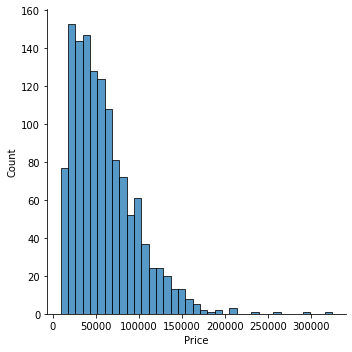

In [ ]:
import seaborn as sas
sas.displot(laptop_dataset['Price'])

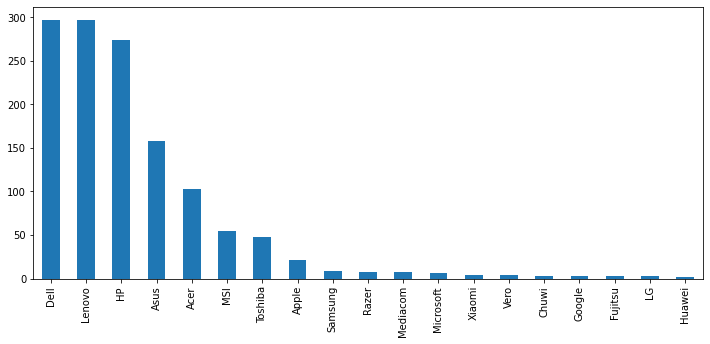

In [ ]:
plt.figure(figsize= (12, 5))
laptop_dataset['Company'].value_counts().plot(kind = 'bar')

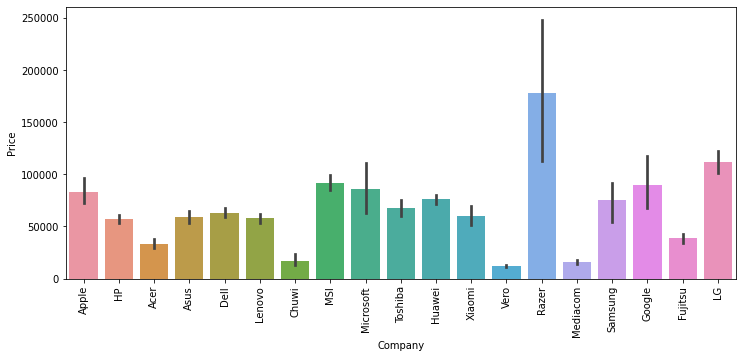

In [ ]:
plt.figure(figsize= (12, 5))
sas.barplot(x = laptop_dataset['Company'], y = laptop_dataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

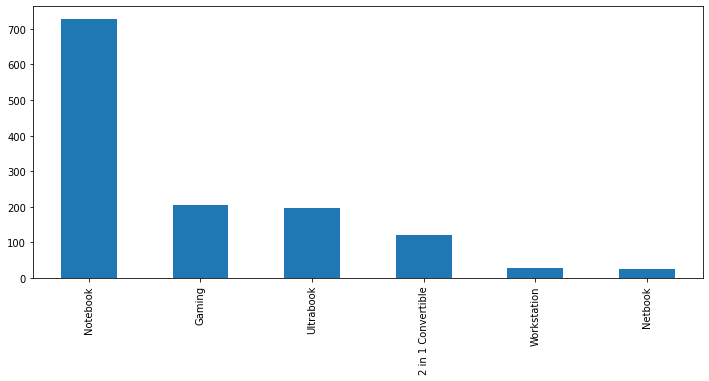

In [ ]:
plt.figure(figsize= (12, 5))
laptop_dataset['TypeName'].value_counts().plot(kind = 'bar')

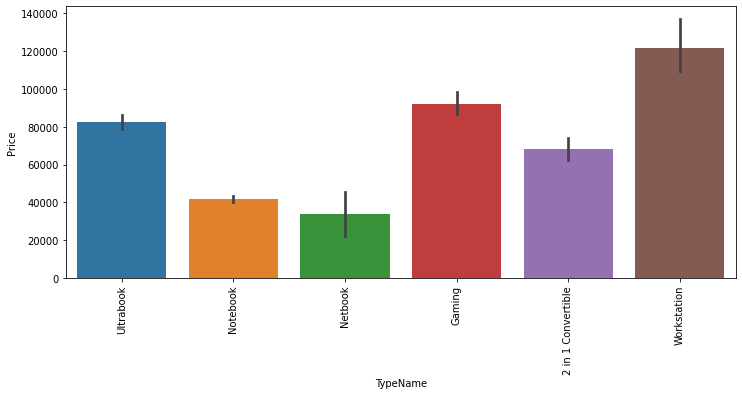

In [ ]:
plt.figure(figsize= (12, 5))
sas.barplot(x = laptop_dataset['TypeName'], y = laptop_dataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

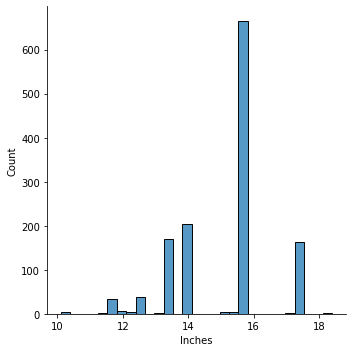

In [ ]:
sas.displot(laptop_dataset['Inches'])

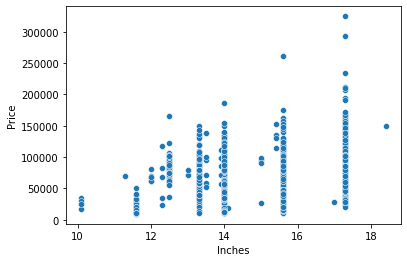

In [ ]:
sas.scatterplot(x = laptop_dataset['Inches'], y = laptop_dataset['Price'])

In [ ]:
laptop_dataset['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
laptop_dataset['Touchscreen'] = laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

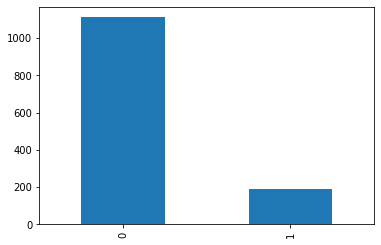

In [ ]:
laptop_dataset['Touchscreen'].value_counts().plot(kind = 'bar')

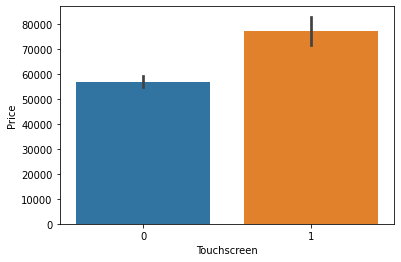

In [ ]:
sas.barplot(x = laptop_dataset['Touchscreen'], y = laptop_dataset['Price'])

In [ ]:
laptop_dataset['IPS'] = laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

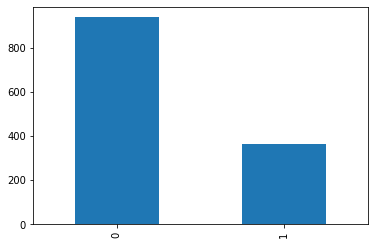

In [ ]:
laptop_dataset['IPS'].value_counts().plot(kind = 'bar')

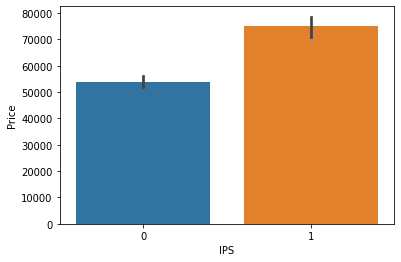

In [ ]:
sas.barplot(x = laptop_dataset['IPS'], y = laptop_dataset['Price'])

In [ ]:
new = laptop_dataset['ScreenResolution'].str.split('x', n = 1, expand = True)
print(new)

                                          0     1
0             IPS Panel Retina Display 2560  1600
1                                      1440   900
2                              Full HD 1920  1080
3             IPS Panel Retina Display 2880  1800
4             IPS Panel Retina Display 2560  1600
...                                     ...   ...
1298   IPS Panel Full HD / Touchscreen 1920  1080
1299  IPS Panel Quad HD+ / Touchscreen 3200  1800
1300                                   1366   768
1301                                   1366   768
1302                                   1366   768

[1303 rows x 2 columns]


In [ ]:
laptop_dataset['x_res'] = new[0]
laptop_dataset['y_res'] = new[1]

In [ ]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
laptop_dataset['x_res'] = laptop_dataset['x_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
laptop_dataset['x_res'] = laptop_dataset['x_res'].astype('int')
laptop_dataset['y_res'] = laptop_dataset['y_res'].astype('int')

In [ ]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [ ]:
laptop_dataset.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [ ]:
#Calculating Pixel Per Inch
laptop_dataset['ppi'] = (((laptop_dataset['x_res']**2) + (laptop_dataset['y_res']))**.5/laptop_dataset['Inches']).astype('float')

In [ ]:
laptop_dataset.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.474960
Name: Price, dtype: float64

In [ ]:
laptop_dataset.drop(columns = ['ScreenResolution'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,192.504698
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,108.294170
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,123.094951
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,187.033278
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,192.504698


In [ ]:
laptop_dataset.drop(columns = ['Inches', 'x_res', 'y_res'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698


In [ ]:
laptop_dataset['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
laptop_dataset['Cpu Name'] = laptop_dataset['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

In [ ]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5


In [ ]:
# Creating a function for Cpu Name feature that take text input
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [ ]:
laptop_dataset['Cpu brand'] = laptop_dataset['Cpu Name'].apply(fetch_processor)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,Intel Core i5


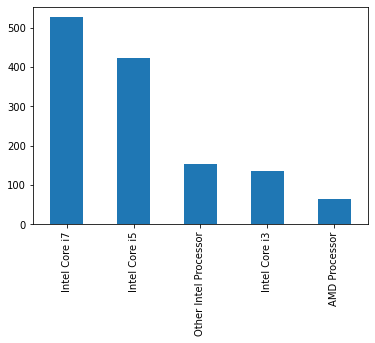

In [ ]:
laptop_dataset['Cpu brand'].value_counts().plot(kind = 'bar')

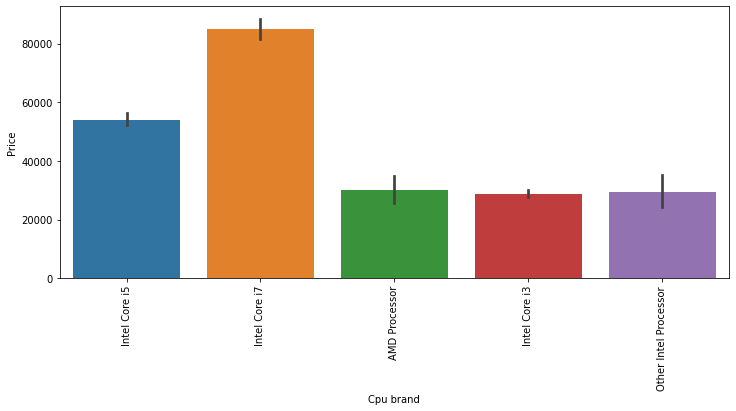

In [ ]:
plt.figure(figsize= (12, 5))
sas.barplot(x = laptop_dataset['Cpu brand'], y = laptop_dataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
laptop_dataset.drop(columns = ['Cpu', 'Cpu Name'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5


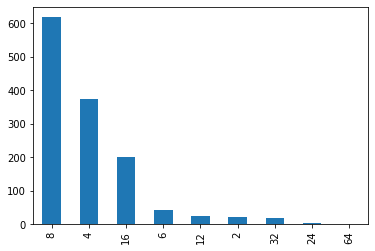

In [ ]:
laptop_dataset['Ram'].value_counts().plot(kind = 'bar')

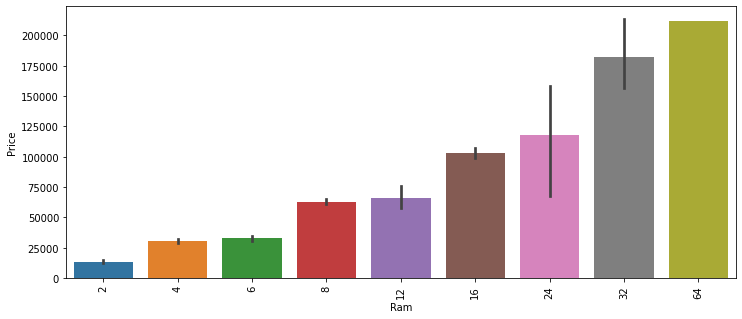

In [ ]:
plt.figure(figsize= (12, 5))
sas.barplot(x = laptop_dataset['Ram'], y = laptop_dataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
laptop_dataset['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

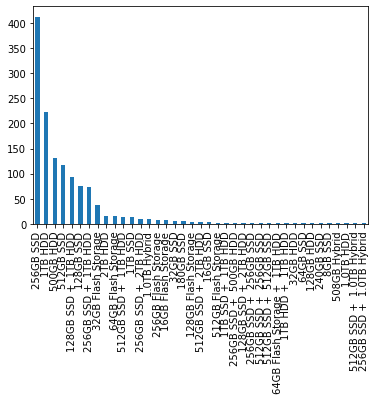

In [ ]:
laptop_dataset['Memory'].value_counts().plot(kind = 'bar')

In [ ]:
laptop_dataset['Memory'] = laptop_dataset['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('GB', '')
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('TB', '000')
new = laptop_dataset["Memory"].str.split("+", n = 1, expand = True)

laptop_dataset["first"]= new[0]
laptop_dataset["first"]=laptop_dataset["first"].str.strip()

laptop_dataset["second"]= new[1]

laptop_dataset["Layer1HDD"] = laptop_dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer1SSD"] = laptop_dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer1Hybrid"] = laptop_dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer1Flash_Storage"] = laptop_dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_dataset['first'] = laptop_dataset['first'].str.replace(r'\D', '')

laptop_dataset["second"].fillna("0", inplace = True)

laptop_dataset["Layer2HDD"] = laptop_dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer2SSD"] = laptop_dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer2Hybrid"] = laptop_dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer2Flash_Storage"] = laptop_dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_dataset['second'] = laptop_dataset['second'].str.replace(r'\D', '')

laptop_dataset["first"] = laptop_dataset["first"].astype(int)
laptop_dataset["second"] = laptop_dataset["second"].astype(int)

laptop_dataset["HDD"]=(laptop_dataset["first"]*laptop_dataset["Layer1HDD"]+laptop_dataset["second"]*laptop_dataset["Layer2HDD"])
laptop_dataset["SSD"]=(laptop_dataset["first"]*laptop_dataset["Layer1SSD"]+laptop_dataset["second"]*laptop_dataset["Layer2SSD"])
laptop_dataset["Hybrid"]=(laptop_dataset["first"]*laptop_dataset["Layer1Hybrid"]+laptop_dataset["second"]*laptop_dataset["Layer2Hybrid"])
laptop_dataset["Flash_Storage"]=(laptop_dataset["first"]*laptop_dataset["Layer1Flash_Storage"]+laptop_dataset["second"]*laptop_dataset["Layer2Flash_Storage"])

laptop_dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
laptop_dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,0,0


In [ ]:
laptop_dataset.drop(columns = ['Memory'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,0,0


In [ ]:
laptop_dataset.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.474960
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
laptop_dataset.drop(columns = ['Hybrid', 'Flash_Storage'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256


In [ ]:
laptop_dataset['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
laptop_dataset['Gpu brand'] = laptop_dataset['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel


In [ ]:
laptop_dataset['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [ ]:
laptop_dataset = laptop_dataset[laptop_dataset['Gpu brand'] != 'ARM']

In [ ]:
laptop_dataset['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

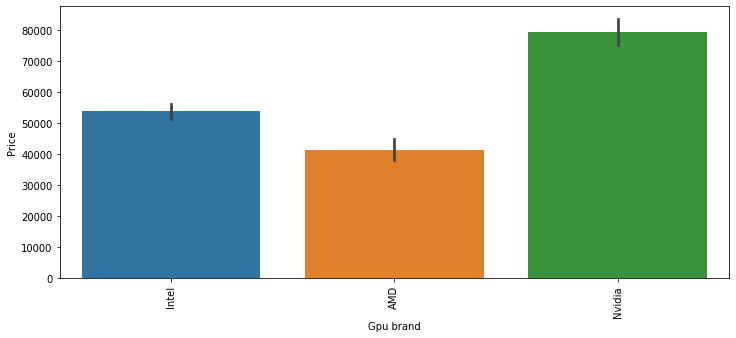

In [ ]:
plt.figure(figsize= (12, 5))
sas.barplot(x = laptop_dataset['Gpu brand'], y = laptop_dataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
laptop_dataset.drop(columns = ['Gpu'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel


In [ ]:
laptop_dataset['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

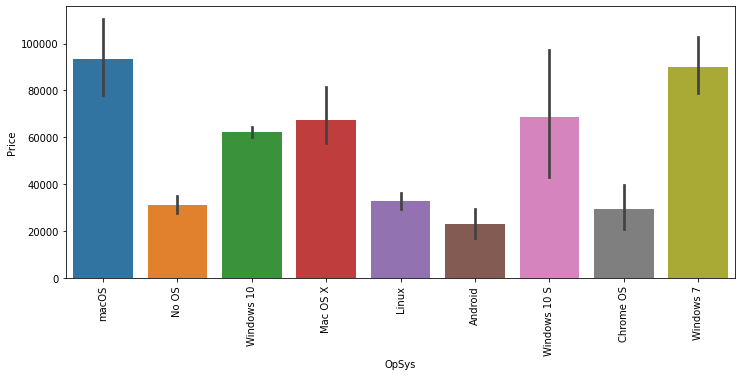

In [ ]:
plt.figure(figsize= (12, 5))
sas.barplot(x = laptop_dataset['OpSys'], y = laptop_dataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
def fetch_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    else:
        if inp == 'macOS' or inp == 'Mac OS X':
            return 'Mac'
        else:
            return 'Others/No OS/Linux'

In [ ]:
laptop_dataset['os'] = laptop_dataset['OpSys'].apply(fetch_os)

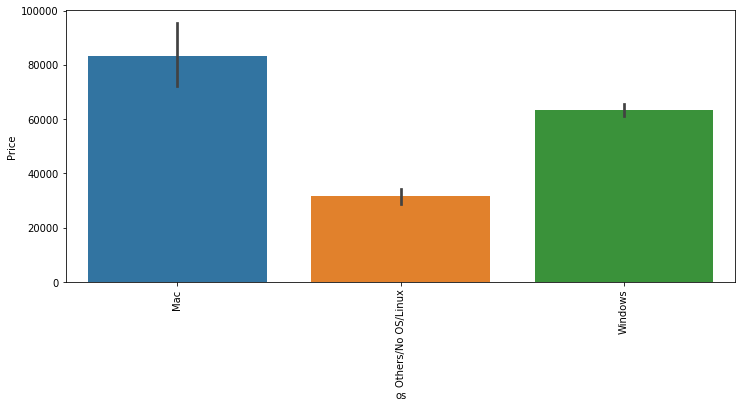

In [ ]:
plt.figure(figsize= (12, 5))
sas.barplot(x = laptop_dataset['os'], y = laptop_dataset['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
laptop_dataset.drop(columns = ['OpSys'], inplace = True)

In [ ]:
laptop_dataset.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel,Mac


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


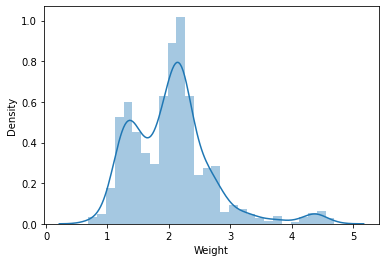

In [ ]:
sas.distplot(laptop_dataset['Weight'])

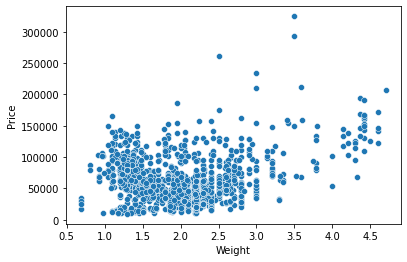

In [ ]:
sas.scatterplot(x = laptop_dataset['Weight'], y = laptop_dataset['Price'])

In [ ]:
laptop_dataset.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.476565
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

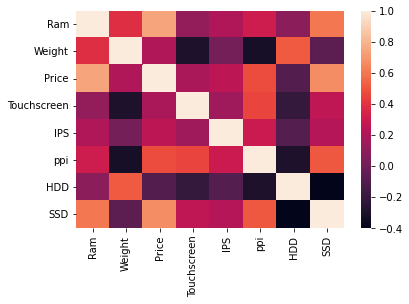

In [ ]:
sas.heatmap(laptop_dataset.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


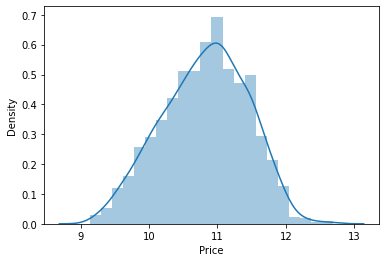

In [ ]:
sas.distplot(np.log(laptop_dataset['Price']))

In [ ]:
X = laptop_dataset.drop(columns = ['Price'])
y = np.log(laptop_dataset['Price'])

In [ ]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,192.504698,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,108.294170,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,123.094951,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,187.033278,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,192.504698,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,137.162945,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,240.622649,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,97.591506,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,87.582121,Intel Core i7,1000,0,AMD,Windows


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# Splitting the Dataset into Training Set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.13, random_state = 2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

# Training the Dataset through different Models

1.   **Linear Regression**



In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.8203099536559597
MAE =  0.20723060406126437



2.   **Ridge Regression**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = Ridge(alpha = 18)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.8225148896618629
MAE =  0.2093069730062631


3.   **Lasso Regressoion**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = Lasso(alpha = .001)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.817203387092742
MAE =  0.2104311395998967


4. **K-Nearest Neighbour**



In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=4)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.8246251007095561
MAE =  0.19238336153158195


5. **Decision Tree Regression**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth= 9)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.8312715604691691
MAE =  0.1887428921209903


6. **Random Forest Regression**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators= 100, random_state= 3, max_samples= 0.5, max_features= 0.1, max_depth= 18)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.9051462928297852
MAE =  0.1483871438958933


7. **Gradient Boost Regression**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators= 420)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.8916194383710485
MAE =  0.15767792473877218


8. **Ada Boost Regression**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators= 16, learning_rate= 1.0)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.7947686778254484
MAE =  0.2315309835220449


9. **Extra Tree Regression**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators= 100, random_state= 3, max_samples= None, max_features= 0.1, max_depth= 18)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

R2 Score =  0.9055230083773822
MAE =  0.1476916459354652


10. **XG Boosting**

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0, 1, 7, 10, 11])], remainder='passthrough')

step2 = XGBRegressor(n_estimators= 16, max_depth= 4, learning_rate= 1.0)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score = ', r2_score(y_test, y_pred))

print('MAE = ', mean_absolute_error(y_test, y_pred))

[16:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score =  0.8709586423627245
MAE =  0.17989117414284675


# Exporting the Model

In [ ]:
import pickle

pickle.dump(laptop_dataset, open('laptop_dataset.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))